In [75]:
library(ISLR)
library(MASS)
library(class)
dim(Auto)
names(Auto)

[1] 392   9

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [76]:
mpg01=rep(0,392)
mpg01[Auto$mpg>median(Auto$mpg)]=1
Auto01 = data.frame(Auto, mpg01)
par(mfrow=c(2,4))
attach(Auto01)
summary(Auto01)

The following object is masked _by_ .GlobalEnv:

    mpg01

The following objects are masked from Auto01 (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto01 (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto01 (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto01 (pos = 6):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto01 (pos = 7):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto01 (pos = 8):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The 

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

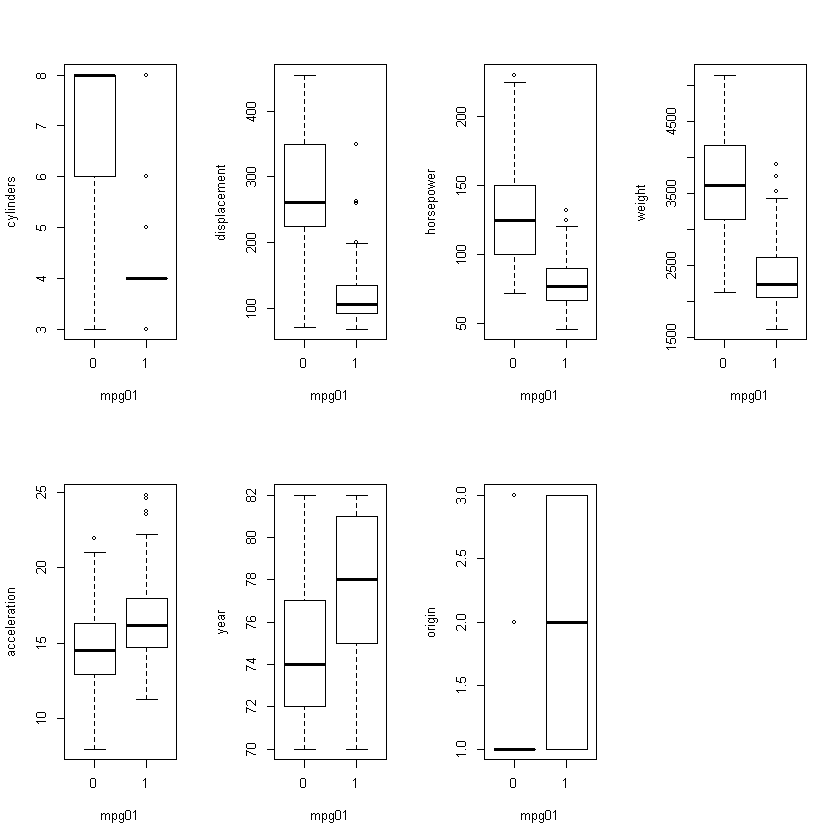

In [77]:
par(mfrow=c(2,4))
boxplot(cylinders~mpg01, data=Auto01, xlab="mpg01", ylab="cylinders")
boxplot(displacement~mpg01, data=Auto01, xlab="mpg01", ylab="displacement")
boxplot(horsepower~mpg01, data=Auto01, xlab="mpg01", ylab="horsepower")
boxplot(weight~mpg01, data=Auto01, xlab="mpg01", ylab="weight")
boxplot(acceleration~mpg01, data=Auto01, xlab="mpg01", ylab="acceleration")
boxplot(year~mpg01, data=Auto01, xlab="mpg01", ylab="year")
boxplot(origin~mpg01, data=Auto01, xlab="mpg01", ylab="origin")

In [78]:
cor(Auto01[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


Cylinders, displacement, horsepower, and weight look like they might be most effective in predicting mpg01. The boxplots show that the values of these variables for mpg01 = 1 vs mpg 01 = 0 differ substantially not only in mean but in interquartile range. The correlation matrix hows that the strongest linear relationships exist between mpg01 and these variables. However these variables also appear highly correlated with each other so might not all be significant.

In [80]:
#will randomly assign 30% of data to a test set. Data is not a time series so do not need an out of time sample.
set.seed(1)
split = as.matrix(runif(nrow(Auto01)))
Auto01Test = Auto01[split > 0.7,]  #that comma is super important!
Auto01Train = Auto01[split <= 0.7,]
nrow(Auto01Test)
nrow(Auto01Train)

[1] 112

[1] 280

In [86]:
ldafit = lda(mpg01~cylinders + displacement + horsepower + weight, data=Auto01Train)
summary(ldafit)
ldapred=predict(ldafit, Auto01Test)
ldaclass=ldapred$class
table(ldaclass, Auto01Test$mpg01)
mean(ldaclass==Auto01Test$mpg01)
mean(ldaclass!=Auto01Test$mpg01)

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   8      -none- numeric  
scaling 4      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

        
ldaclass  0  1
       0 48  2
       1 11 51

[1] 0.8839286

[1] 0.1160714

The test error rate is 11.6%. 

In [87]:
qdafit = qda(mpg01~cylinders + displacement + horsepower + weight, data=Auto01Train)
qdapred=predict(qdafit, Auto01Test)
qdaclass=qdapred$class
table(qdaclass, Auto01Test$mpg01)
mean(qdaclass==Auto01Test$mpg01)
mean(qdaclass!=Auto01Test$mpg01)

        
qdaclass  0  1
       0 48  6
       1 11 47

[1] 0.8482143

[1] 0.1517857

The test error rate is 15.2%

In [90]:
glmfit = glm(mpg01~cylinders + displacement + horsepower + weight, data=Auto01Train, family=binomial)
summary(glmfit)
glmprobs=predict(glmfit, Auto01Test, type="response")
glmpred=rep(0, nrow(Auto01Test))
glmpred[glmprobs>.5]=1
table(glmpred, Auto01Test$mpg01)
mean(glmpred==Auto01Test$mpg01)
mean(glmpred!=Auto01Test$mpg01)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight, family = binomial, data = Auto01Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2960  -0.1172   0.0748   0.2987   3.4212  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  15.1739382  2.4149411   6.283 3.31e-10 ***
cylinders    -0.0851831  0.4137404  -0.206 0.836880    
displacement -0.0044862  0.0093476  -0.480 0.631272    
horsepower   -0.0579770  0.0178013  -3.257 0.001126 ** 
weight       -0.0029551  0.0008819  -3.351 0.000805 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 388.03  on 279  degrees of freedom
Residual deviance: 135.68  on 275  degrees of freedom
AIC: 145.68

Number of Fisher Scoring iterations: 7


       
glmpred  0  1
      0 50  3
      1  9 50

[1] 0.8928571

[1] 0.1071429

The test error rate is 10.7%.

In [97]:
library(class)
#need matrix function because knn wants a matrix not a vector for train and test
trainX=cbind(Auto01Train$cylinders, Auto01Train$displacement, Auto01Train$horsepower, Auto01Train$weight)
testX=cbind(Auto01Test$cylinders, Auto01Test$displacement, Auto01Test$horsepower, Auto01Test$weight)
set.seed(1)
knnpred=knn(trainX, testX, Auto01Train$mpg01, k=1)
table(knnpred, Auto01Test$mpg01)
mean(knnpred==Auto01Test$mpg01)
mean(knnpred!=Auto01Test$mpg01)
knnpred=knn(trainX, testX, Auto01Train$mpg01, k=2)
table(knnpred, Auto01Test$mpg01)
mean(knnpred==Auto01Test$mpg01)
mean(knnpred!=Auto01Test$mpg01)
knnpred=knn(trainX, testX, Auto01Train$mpg01, k=3)
table(knnpred, Auto01Test$mpg01)
mean(knnpred==Auto01Test$mpg01)
mean(knnpred!=Auto01Test$mpg01)
knnpred=knn(trainX, testX, Auto01Train$mpg01, k=4)
table(knnpred, Auto01Test$mpg01)
mean(knnpred==Auto01Test$mpg01)
mean(knnpred!=Auto01Test$mpg01)
knnpred=knn(trainX, testX, Auto01Train$mpg01, k=5)
table(knnpred, Auto01Test$mpg01)
mean(knnpred==Auto01Test$mpg01)
mean(knnpred!=Auto01Test$mpg01)
knnpred=knn(trainX, testX, Auto01Train$mpg01, k=6)
table(knnpred, Auto01Test$mpg01)
mean(knnpred==Auto01Test$mpg01)
mean(knnpred!=Auto01Test$mpg01)

       
knnpred  0  1
      0 49  8
      1 10 45

[1] 0.8392857

[1] 0.1607143

       
knnpred  0  1
      0 49  5
      1 10 48

[1] 0.8660714

[1] 0.1339286

       
knnpred  0  1
      0 46  4
      1 13 49

[1] 0.8482143

[1] 0.1517857

       
knnpred  0  1
      0 47  4
      1 12 49

[1] 0.8571429

[1] 0.1428571

       
knnpred  0  1
      0 50  5
      1  9 48

[1] 0.875

[1] 0.125

       
knnpred  0  1
      0 47  5
      1 12 48

[1] 0.8482143

[1] 0.1517857

Test error rates are 16.1%, 13.4%, 15.2%, 14.3%, 12.5%, and 15.2% for k = 1, 2, 3, 4, 5, 6 respectively. K=5 seems to perform best.